In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,ShuffleSplit,LeaveOneOut
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm, zscore
#import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

# Classification of clear speech-detection

In [2]:
pathr="/home/sultan/EEG/CLUSTER_channels/S_E12/"
fnamecl='Allsube12.xlsx'
d=pd.read_excel(pathr+fnamecl)
print("Total rows: {0}".format(len(d)))

Total rows: 32


In [6]:
# allacc=[];
# for count in range(2,108):
#     dpc=[];yc=[];
#     for i in range(3):
#         a=[]
#         k=0
#         for j in range(5):
#             #print i,k
#             dd=d.values[i,k+count]
#             #b=np.concatenate((M,dd),axis=0)
#             j+=1
#             k=106*j
#             a.append(dd)      
#         y=d.values[i,0]
#         a.append(y)
#         dpc.append(a)
#         c=pd.DataFrame(dpc)
#         X=c.iloc[:,0:5]
#         labels=c.iloc[:,5]

Text(0,0.5,'% Accuracy')

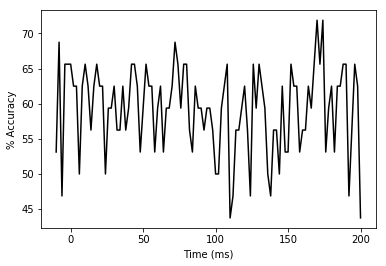

In [44]:
allacc=[];
for count in range(2,108):# Number of sample in the data
    dpc=[];yc=[];
    for i in range(32):
        a=[]
        k=0
        for j in range(5):
            #print i,k
            dd=d.values[i,k+count] # data separate each sample
            #b=np.concatenate((M,dd),axis=0)
            j+=1
            k=106*j
            a.append(dd)      
        y=d.values[i,0]; # Label first column
        a.append(y)
        dpc.append(a)
        c=pd.DataFrame(dpc)
        X=c.iloc[:,0:5]
        y=c.iloc[:,5]
        #print y
        # Upto this feature extraction
    #print X
    leaveout = LeaveOneOut()
    cn=0; totalacc=0;
    X_scaled = preprocessing.scale(X)
    for train_index, test_index in leaveout.split(X_scaled):
        #print train_index,test_index
        ##X_trn, X_tst = X[train_index], X[test_index]
        X_trn, X_tst = X_scaled[train_index], X_scaled[test_index]
        y_trn, y_tst = y[train_index], y[test_index]
        parameters = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1, 10,100,1000],'gamma':[0.01,.002]}
        svc = svm.SVC()
        clf = GridSearchCV(svc, parameters)
        #print X_trn, y_trn
        clf.fit(X_trn, y_trn)
        #print clf.best_estimator_
        acc = accuracy_score(clf.best_estimator_.predict(X_tst),y_tst)
        totalacc = totalacc + acc
        cn = cn + 1
        #print cn, acc, totalacc; # See the how many correct over the whole
        score=totalacc/cn*100.0
    allacc.append(score)
    Acdw=pd.DataFrame(allacc)
    #print score
t=np.linspace(-10,200,106)
#Acd.plot(kind='line',ylim=[0,1])
plt.plot(t,Acdw,c='k')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
#print par

In [5]:
#c

In [45]:
#print par
time=pd.DataFrame(t)
tad=pd.concat([time, Acdw],axis=1)
selt=tad.iloc[25:34]
av=selt.mean()
print selt,'\n','The average accuracy over the time is:', av.iloc[1]*1.0
#print tad.iloc[20:42]
#tad.to_csv('clear_speech_classi.csv')

       0       0
25  40.0  59.375
26  42.0  65.625
27  44.0  65.625
28  46.0  62.500
29  48.0  53.125
30  50.0  59.375
31  52.0  65.625
32  54.0  62.500
33  56.0  62.500 
The average accuracy over the time is: 61.80555555555556


Text(0,0.5,'% Accuracy')

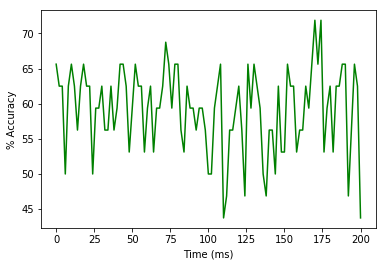

In [46]:
tw1=tad.iloc[5:,0];Acdw1=tad.iloc[5:,1];
plt.plot(tw1,Acdw1,c='g')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')

# Classification from LH's two clusters (C1, C2)

Text(0,0.5,'% Accuracy')

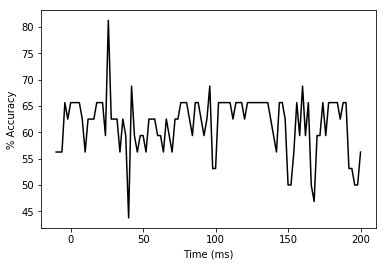

In [47]:
allacc=[];
for count in range(2,108): # Number of sample in the data
    dpc=[];yc=[]; # empty variable for dictionary
    for i in range(32): # number of participant
        a=[]; # Dictionary
        k=0 ;
        for j in range(2):
            #print i,k
            dd=d.values[i,k+count] ; # data separate each sample
            #b=np.concatenate((M,dd),axis=0)
            j+=1
            k=106*j
            a.append(dd) # append features      
        y=d.values[i,0]
        a.append(y)
        dpc.append(a) # data frame with label
        c=pd.DataFrame(dpc) # c is the new data 
        X=c.iloc[:,0:2] # X is the feature from clusters
        labels=c.iloc[:,2]
        y=labels
        #print X
# Upto this feature extraction
    cn=0; totalacc=0;
    leaveout = LeaveOneOut()
    X_scaled = preprocessing.scale(X)
    for train_index, test_index in leaveout.split(X_scaled):
        #print train_index,test_index
        ##X_trn, X_tst = X[train_index], X[test_index]
        X_trn, X_tst = X_scaled[train_index], X_scaled[test_index]
        y_trn, y_tst = y[train_index], y[test_index]
        parameters = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1, 10,100,1000],'gamma':[0.01,.002]}
        svc = svm.SVC()
        clf = GridSearchCV(svc, parameters)
        #print X_trn, y_trn
        clf.fit(X_trn, y_trn)
        #print clf.best_estimator_
        acc = accuracy_score(clf.best_estimator_.predict(X_tst),y_tst)
        totalacc = totalacc + acc
        cn = cn + 1
        #print cn, acc, totalacc; # See the how many correct over the whole
        score=totalacc/cn*100.0
    allacc.append(score)
    Acdlh=pd.DataFrame(allacc)
    #print acc*100.0
t=np.linspace(-10,200,106)
#Acd.plot(kind='line',ylim=[0,1])
plt.plot(t,Acdlh,c='k')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
#print par

In [48]:
#print par
time=pd.DataFrame(t)
tadlh=pd.concat([time, Acdlh],axis=1)
seltlh=tadlh.iloc[17:35]
avlh=seltlh.mean()
print seltlh,'\n','The average accuracy over the time is:', avlh.iloc[1]*1.0
#print tad.iloc[20:42]
#tad.to_csv('clear_speech_classi.csv')

       0       0
17  24.0  59.375
18  26.0  81.250
19  28.0  62.500
20  30.0  62.500
21  32.0  62.500
22  34.0  56.250
23  36.0  62.500
24  38.0  59.375
25  40.0  43.750
26  42.0  68.750
27  44.0  59.375
28  46.0  56.250
29  48.0  59.375
30  50.0  59.375
31  52.0  56.250
32  54.0  62.500
33  56.0  62.500
34  58.0  62.500 
The average accuracy over the time is: 60.9375


Text(0,0.5,'% Accuracy')

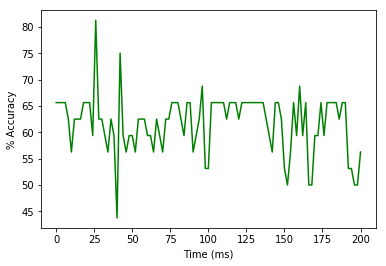

In [20]:
tlh1=tadlh.iloc[5:,0];Acdlh1=tadlh.iloc[5:,1];
plt.plot(tlh1,Acdlh1,c='g')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')

# Classification from RH's two clusters (C3, C4)

Text(0,0.5,'% Accuracy')

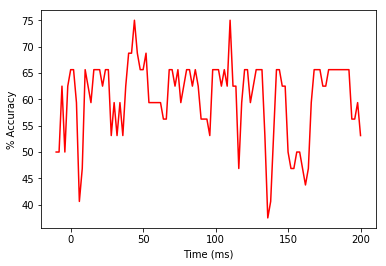

In [49]:
allacc=[];
for count in range(2,108): # Number of sample in the data
    dpc=[];yc=[]; # empty variable for dictionary
    for i in range(32): # number of participant
        a=[]; # Dictionary
        k=0 ;
        for j in range(2,4):
            k=106*j
            #print i,k
            dd=d.values[i,k+count] ; # data separate each sample
            #b=np.concatenate((M,dd),axis=0)
            j+=1
            a.append(dd) # append features      
        y=d.values[i,0]
        a.append(y)
        dpc.append(a) # data frame with label
        c=pd.DataFrame(dpc) # c is the new data 
        X=c.iloc[:,0:2] # X is the feature from clusters
        labels=c.iloc[:,2]
        y=labels
# Upto this feature extraction
    leaveout = LeaveOneOut()  
    cn=0; totalacc=0;
    X_scaled = preprocessing.scale(X)
    for train_index, test_index in leaveout.split(X_scaled):
        #print train_index,test_index
        ##X_trn, X_tst = X[train_index], X[test_index]
        X_trn, X_tst = X_scaled[train_index], X_scaled[test_index]
        y_trn, y_tst = y[train_index], y[test_index]
        parameters = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1, 10,100,1000],'gamma':[0.01,.002]}
        svc = svm.SVC()
        clf = GridSearchCV(svc, parameters)
        #print X_trn, y_trn
        clf.fit(X_trn, y_trn)
        #print clf.best_estimator_
        acc = accuracy_score(clf.best_estimator_.predict(X_tst),y_tst)
        totalacc = totalacc + acc
        cn = cn + 1
        #print cn, acc, totalacc; # See the how many correct over the whole
        score=totalacc/cn*100.0
    allacc.append(score)
    Acdrh=pd.DataFrame(allacc)
    #print acc*100.0
t=np.linspace(-10,200,106)
#Acd.plot(kind='line',ylim=[0,1])
plt.plot(t,Acdrh,c='r')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
#print par

In [51]:
#print par
timerh=pd.DataFrame(t)
tadrh=pd.concat([timerh, Acdrh],axis=1)
seltrh=tadrh.iloc[25:37]
av=seltrh.mean()
print seltrh,'\n','The average accuracy over the time is:', av.iloc[1]*1.0
#print tad.iloc[40:60]
#tadn.to_csv('Noise-degraded.csv')

       0       0
25  40.0  68.750
26  42.0  68.750
27  44.0  75.000
28  46.0  68.750
29  48.0  65.625
30  50.0  65.625
31  52.0  68.750
32  54.0  59.375
33  56.0  59.375
34  58.0  59.375
35  60.0  59.375
36  62.0  59.375 
The average accuracy over the time is: 64.84375


48.0